<a href="https://colab.research.google.com/github/H-jung/LPOINT_Contest/blob/main/%EB%A1%AF%EB%8D%B0%EB%A9%A4%EB%B2%84%EC%8A%A4_%ED%98%84%EC%A0%95EDA_%EC%A0%9C%ED%9C%B4%EC%82%ACData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 롯데멤버스 빅데이터경진대회
- 팀장 : 임현정
- 팀원 : 하혜영, 김윤지

## 사용 라이브러리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rc('font',family = 'Malgun Gothic')
matplotlib.rc('axes',unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [ ]:
# # 고객 데모 정보
# data1 = pd.read_csv("LPOINT_BIG_COMP_01_DEMO.csv")
# data1.columns = ['고객번호','성별','연령대','거주지']

# # 유통사 상품 구매 내역
# data2 = pd.read_csv("/content/drive/MyDrive/백업파일/공모전/LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv",parse_dates = ['de_dt'])
# data2.columns = ['고객번호','영수증번호','채널','제휴사','점포코드','상품코드','구매일자','구매시간','구매금액','구매수량']
# data2['채널'] = np.where(data2['채널'] == 1, "오프라인","온라인")

# # 제휴사 서비스 이용 내역
# data3 = pd.read_csv("LPOINT_BIG_COMP_03_COP_U.csv", parse_dates = ['de_dt','vst_dt'])
# data3.columns = ['고객번호','영수증번호','제휴사','점포코드','채널','이용일자','방문일자','이용시간','이용금액']
# data3['채널'] = np.where(data3['채널'] == 1, "오프라인","온라인")

# # 유통사 상품 카테고리 마스터
# data4 = pd.read_csv("/content/drive/MyDrive/백업파일/공모전/LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv")
# data4.columns = ['상품코드','소분류','대분류','중분류']

# # 유통사/제휴사 점포 마스터
# data5 = pd.read_csv("LPOINT_BIG_COMP_05_BR.csv")
# data5.columns = ['점포코드','제휴사','점포대분류','점포중분류']

# # 엘페이 결제 내역
# data6 = pd.read_csv("/content/drive/MyDrive/백업파일/공모전/LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv",parse_dates = ['de_dt'])
# data6.columns = ['고객번호','영수증번호','제휴사','채널','이용일자','이용시간','이용금액']
# data6['채널'] = np.where(data6['채널'] == 1, "오프라인","온라인")

In [ ]:
# 고객 데모 정보
data1 = pd.read_csv("/content/drive/MyDrive/백업파일/공모전/LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv")
data1.columns = ['고객번호','성별','연령대','거주지']

# 유통사 상품 구매 내역
data2 = pd.read_csv("/content/drive/MyDrive/백업파일/공모전/LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv",parse_dates = ['de_dt'])
data2.columns = ['고객번호','영수증번호','채널','제휴사','점포코드','상품코드','구매일자','구매시간','구매금액','구매수량']
data2['채널'] = np.where(data2['채널'] == 1, "오프라인","온라인")

# 제휴사 서비스 이용 내역
data3 = pd.read_csv("/content/drive/MyDrive/백업파일/공모전/LPOINT_BIG_COMP/LPOINT_BIG_COMP_03_COP_U.csv", parse_dates = ['de_dt','vst_dt'])
data3.columns = ['고객번호','영수증번호','제휴사','점포코드','채널','이용일자','방문일자','이용시간','이용금액']
data3['채널'] = np.where(data3['채널'] == 1, "오프라인","온라인")

# 유통사 상품 카테고리 마스터
data4 = pd.read_csv("/content/drive/MyDrive/백업파일/공모전/LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv")
data4.columns = ['상품코드','소분류','대분류','중분류']

# 유통사/제휴사 점포 마스터
data5 = pd.read_csv("/content/drive/MyDrive/백업파일/공모전/LPOINT_BIG_COMP/LPOINT_BIG_COMP_05_BR.csv")
data5.columns = ['점포코드','제휴사','점포대분류','점포중분류']

# 엘페이 결제 내역
data6 = pd.read_csv("/content/drive/MyDrive/백업파일/공모전/LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv",parse_dates = ['de_dt'])
data6.columns = ['고객번호','영수증번호','제휴사','채널','이용일자','이용시간','이용금액']
data6['채널'] = np.where(data6['채널'] == 1, "오프라인","온라인")

### 고객분류

In [ ]:
data3.이용일자.describe()

count                  248304
unique                    369
top       2021-05-05 00:00:00
freq                     1146
first     2020-12-27 00:00:00
last      2021-12-31 00:00:00
Name: 이용일자, dtype: object

In [ ]:
data2.구매일자.describe()

count                 4381743
unique                    365
top       2021-01-09 00:00:00
freq                    22072
first     2021-01-01 00:00:00
last      2021-12-31 00:00:00
Name: 구매일자, dtype: object

In [ ]:
data6.이용일자.describe()

count                  353184
unique                    365
top       2021-06-07 00:00:00
freq                     1506
first     2021-01-01 00:00:00
last      2021-12-31 00:00:00
Name: 이용일자, dtype: object

In [ ]:
data1.고객번호.nunique()

29913

In [ ]:
data2.고객번호.nunique()

26917

In [ ]:
data3.고객번호.nunique()

21769

In [ ]:
data6.고객번호.nunique()

8906

#### 유령고객 : 39명

In [ ]:
cust_all = data1.고객번호.unique().tolist()
cust2 = data2.고객번호.unique().tolist()
cust3 = data3.고객번호.unique().tolist()
cust6 = data6.고객번호.unique().tolist()

In [ ]:
cust236 = list(set(cust2) | set(cust3) | set(cust6))
# 유령고객
ghost_cust = list(set(cust_all)-set(cust236));len(ghost_cust)

39

In [ ]:
data1[data1.고객번호.isin(ghost_cust)].연령대.value_counts()

70대    20
60대    11
20대     4
30대     3
40대     1
Name: 연령대, dtype: int64

#### 유통사 + 제휴사 + 엘페이 다 쓰는 고객 : 7879명

In [ ]:
vip_cust = list(set(cust2) & set(cust3) & set(cust6))

In [ ]:
len(vip_cust)

7879

In [ ]:
vip1 = data2.loc[data2.고객번호.isin(vip_cust),['고객번호','구매금액']].groupby('고객번호')[['구매금액']].sum().reset_index()
vip2 = data3.loc[data3.고객번호.isin(vip_cust),['고객번호','이용금액']].groupby('고객번호')[['이용금액']].sum().reset_index()
vip3 = data6.loc[data6.고객번호.isin(vip_cust),['고객번호','이용금액']].groupby('고객번호')[['이용금액']].sum().reset_index()

In [ ]:
total_df = pd.merge(vip1,vip2,on='고객번호').merge(vip3,on='고객번호')
total_df['총구매액'] = total_df.구매금액 + total_df.이용금액_x + total_df.이용금액_y
total = total_df.loc[:,['고객번호','총구매액']];total

,고객번호,총구매액
0,M000136117,28748531.0
1,M000419293,5653101.0
2,M000494848,30430065.0
3,M000557840,3761418.0
4,M000871427,2322180.0
...,...,...
7874,M999227380,4796170.0
7875,M999268192,1827060.0
7876,M999599111,5661659.0
7877,M999770689,2087570.0


In [ ]:
total.총구매액.describe()

count    7.879000e+03
mean     9.720863e+06
std      2.218591e+07
min      1.910000e+04
25%      2.119898e+06
50%      4.509420e+06
75%      9.398489e+06
max      7.119147e+08
Name: 총구매액, dtype: float64

In [ ]:
total.총구매액.mean()

9720863.271227313

In [ ]:
data3.이용금액.mean()

20130.66061763

In [ ]:
data6.이용금액.mean()

60811.79113153484

In [ ]:
data2.구매금액.mean()

23212.53765841584

#### 유통사 + 제휴사만 쓰는 고객 (엘페이 X) : 11051명 (36.9%)

In [ ]:
cust23 = list(set(cust2) & set(cust3) - set(cust6)); len(cust23)

11051

In [ ]:
print(len(list(set(cust2) | set(cust3))))
print(len(list(set(cust2) | set(cust3) - set(cust6))))

29756
29544


#### 유통사 + 엘페이 쓰는 고객 (제휴사 X) : 697명

In [ ]:
cust26 = list(set(cust2) & set(cust6) - set(cust3)); len(cust26)

697

#### 제휴사 + 엘페이 쓰는 고객 (유통사 X) : 212명

In [ ]:
cust36 = list(set(cust3) & set(cust6) - set(cust2)); len(cust36)

212

#### 유통사만 쓰는 고객 : 7290명

In [ ]:
only2 = list(set(cust2)-set(cust3)-set(cust6)-set(ghost_cust)) ; len(only2)

7290

#### 제휴사만 쓰는 고객 : 2627명

In [ ]:
only3 = list(set(cust3)-set(cust2)-set(cust6)-set(ghost_cust)) ; len(only3)

2627

#### 엘페이만 쓰는 고객 : 118명

In [ ]:
only6 = list(set(cust6)-set(cust2)-set(cust3)-set(ghost_cust)) ; len(only6)

118

## 데이터 전처리

### 데이터 개수

In [ ]:
print(data3.shape)

(248304, 9)


### 결측치 확인 및 처리
- 점포코드 열에 55개의 결측치 확인

In [ ]:
data3.isnull().sum()

고객번호      0
영수증번호     0
제휴사       0
점포코드     55
채널        0
이용일자      0
방문일자      0
이용시간      0
이용금액      0
dtype: int64

- 결측치의 경우, 모두 채널이 **온라인**, 제휴사가 **E01** 으로 확인.

In [ ]:
data3.loc[data3.isnull().any(axis=1)]['채널'].value_counts()

온라인    55
Name: 채널, dtype: int64

In [ ]:
data3.loc[data3.isnull().any(axis=1)]['제휴사'].value_counts()

E01    55
Name: 제휴사, dtype: int64

In [ ]:
55/len(data3)*100

0.02215026741413751

- 0.02%의 데이터가 결측. 따라서 제거하고 진행
> 왜 E01(렌탈업종)을 온라인에서 살 때 점포코드가 없을까??

In [ ]:
data3_nn = data3.loc[data3.notnull().all(axis=1)].reset_index(drop=True);data3_nn.isnull().sum()

고객번호     0
영수증번호    0
제휴사      0
점포코드     0
채널       0
이용일자     0
방문일자     0
이용시간     0
이용금액     0
dtype: int64

### 이상치 처리

- 이용금액 : 비정상적으로 큰 5개의 데이터 삭제
> 제휴사 B01(숙박업종) : 호텔 스위트룸 이용인가?

In [ ]:
data3_nn.describe()

,이용시간,이용금액
count,248249.000000,2.482490e+05
mean,14.737465,2.011594e+04
std,3.814015,2.430299e+05
min,0.000000,1.000000e+00
25%,12.000000,5.000000e+03
50%,15.000000,9.000000e+03
75%,18.000000,1.580000e+04
max,23.000000,7.009200e+07


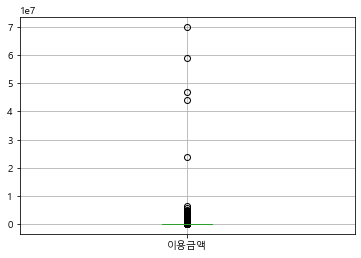

In [ ]:
data3_nn[['이용금액']].boxplot();plt.show()

In [ ]:
data3_nn[data3_nn.이용금액>10000000]

,고객번호,영수증번호,제휴사,점포코드,채널,이용일자,방문일자,이용시간,이용금액
1536,M034936927,21102420B014041708,B01,B010014,오프라인,2021-10-24,2021-10-24,20,46810900
68757,M867765456,21022719B010855120,B01,B010019,오프라인,2021-02-27,2021-02-27,19,59090000
130383,M414456394,21121214B015022577,B01,B010014,오프라인,2021-12-12,2021-12-12,14,23765600
215054,M439502359,21112714B010943839,B01,B010014,오프라인,2021-11-27,2021-11-27,14,44141200
216637,M481734389,21102320B015974616,B01,B010019,오프라인,2021-10-23,2021-10-23,20,70092000


In [ ]:
data3_nn = data3_nn[data3_nn.이용금액<10000000]

- 이용시간 : 0인 데이터 1483개 (0.59%) 처리 어쩌죠?

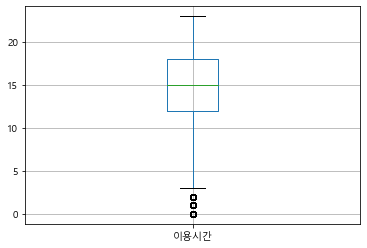

In [ ]:
data3_nn[['이용시간']].boxplot();plt.show()

In [ ]:
len(data3_nn[data3_nn.이용시간==0])

1483

In [ ]:
len(data3_nn[data3_nn.이용시간==0])/len(data3_nn)*100

0.5973961102785968

### 데이터 병합

In [ ]:
df3 = pd.merge(data3_nn,data1).merge(data5);df3.head()

,고객번호,영수증번호,제휴사,점포코드,채널,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지,점포대분류,점포중분류
0,M839993508,21102612B015763935,B01,B010012,오프라인,2021-10-26,2021-10-26,12,60000,남성,70대,Z17,Z17,Z17024
1,M839993508,21110610B014219744,B01,B010012,오프라인,2021-11-06,2021-11-06,10,17100,남성,70대,Z17,Z17,Z17024
2,M839993508,21021112B013419710,B01,B010012,오프라인,2021-02-11,2021-02-11,12,136500,남성,70대,Z17,Z17,Z17024
3,M839993508,21092010B012637545,B01,B010012,오프라인,2021-09-20,2021-09-20,10,34200,남성,70대,Z17,Z17,Z17024
4,M839993508,21062011B015813935,B01,B010012,오프라인,2021-06-20,2021-06-20,11,17100,남성,70대,Z17,Z17,Z17024


## 파생변수

- 방문월, 방문계절, 결제 후 방문까지 소요시간 <br>
(방문계절 : 이용일자는 결제일자고, 방문일자는 실제 이용한 날짜..?로 생각하고 방문일자로 계절 추출)

In [ ]:
df3['방문월'] = df3.방문일자.dt.month;df3.head()

,고객번호,영수증번호,제휴사,점포코드,채널,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지,점포대분류,점포중분류,결제후방문,방문월
0,M839993508,21102612B015763935,B01,B010012,오프라인,2021-10-26,2021-10-26,12,60000,남성,70대,Z17,Z17,Z17024,0,10
1,M839993508,21110610B014219744,B01,B010012,오프라인,2021-11-06,2021-11-06,10,17100,남성,70대,Z17,Z17,Z17024,0,11
2,M839993508,21021112B013419710,B01,B010012,오프라인,2021-02-11,2021-02-11,12,136500,남성,70대,Z17,Z17,Z17024,0,2
3,M839993508,21092010B012637545,B01,B010012,오프라인,2021-09-20,2021-09-20,10,34200,남성,70대,Z17,Z17,Z17024,0,9
4,M839993508,21062011B015813935,B01,B010012,오프라인,2021-06-20,2021-06-20,11,17100,남성,70대,Z17,Z17,Z17024,0,6


In [ ]:
def season(x):
    if 3<=x<=5:
        return "봄"
    elif 6<=x<=8:
        return "여름"
    elif 9<=x<=11:
        return "가을"
    else:
        return "겨울"
    
df3['방문계절'] = df3.방문월.apply(lambda x : season(x));df3.head()

,고객번호,영수증번호,제휴사,점포코드,채널,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지,점포대분류,점포중분류,결제후방문,방문월,방문계절
0,M839993508,21102612B015763935,B01,B010012,오프라인,2021-10-26,2021-10-26,12,60000,남성,70대,Z17,Z17,Z17024,0,10,가을
1,M839993508,21110610B014219744,B01,B010012,오프라인,2021-11-06,2021-11-06,10,17100,남성,70대,Z17,Z17,Z17024,0,11,가을
2,M839993508,21021112B013419710,B01,B010012,오프라인,2021-02-11,2021-02-11,12,136500,남성,70대,Z17,Z17,Z17024,0,2,겨울
3,M839993508,21092010B012637545,B01,B010012,오프라인,2021-09-20,2021-09-20,10,34200,남성,70대,Z17,Z17,Z17024,0,9,가을
4,M839993508,21062011B015813935,B01,B010012,오프라인,2021-06-20,2021-06-20,11,17100,남성,70대,Z17,Z17,Z17024,0,6,여름


In [ ]:
df3['결제후방문']=(df3['방문일자']-df3['이용일자']).dt.days
df3.head()

,고객번호,영수증번호,제휴사,점포코드,채널,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지,점포대분류,점포중분류,결제후방문
0,M839993508,21102612B015763935,B01,B010012,오프라인,2021-10-26,2021-10-26,12,60000,남성,70대,Z17,Z17,Z17024,0
1,M839993508,21110610B014219744,B01,B010012,오프라인,2021-11-06,2021-11-06,10,17100,남성,70대,Z17,Z17,Z17024,0
2,M839993508,21021112B013419710,B01,B010012,오프라인,2021-02-11,2021-02-11,12,136500,남성,70대,Z17,Z17,Z17024,0
3,M839993508,21092010B012637545,B01,B010012,오프라인,2021-09-20,2021-09-20,10,34200,남성,70대,Z17,Z17,Z17024,0
4,M839993508,21062011B015813935,B01,B010012,오프라인,2021-06-20,2021-06-20,11,17100,남성,70대,Z17,Z17,Z17024,0


## EDA

### 성별

#### 1) 여성이 남성보다 많다.

In [ ]:
df3.성별.value_counts()

여성    163727
남성     84517
Name: 성별, dtype: int64

#### 2) 성별 이용금액의 평균은 남성이 더 높다.

In [ ]:
df3.groupby('성별')['이용금액'].mean()

성별
남성    21647.638913
여성    17836.211095
Name: 이용금액, dtype: float64

#### 3) 최대 이용금액은 여성이 더 높다.
- BUT, 여성 이용금액의 이상치 (6,600,000 이후엔 300만원대)

In [ ]:
df3.groupby('성별')['이용금액'].max()

성별
남성    5614400
여성    6600000
Name: 이용금액, dtype: int64

<AxesSubplot:xlabel='성별', ylabel='이용금액'>

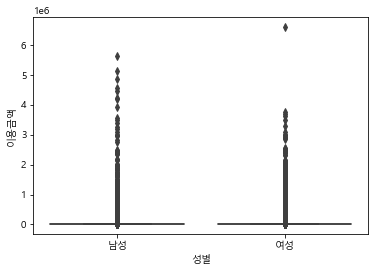

In [ ]:
sns.boxplot(x='성별',y='이용금액',data=df3)

In [ ]:
df3.query('성별=="여성" & 이용금액 >6000000')

,고객번호,영수증번호,제휴사,점포코드,채널,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지,점포대분류,점포중분류,결제후방문,방문월,방문계절
118652,M732529318,21070913B015066158,B01,B010018,오프라인,2021-07-09,2021-07-09,13,6600000,여성,60대,Z16,Z16,Z16016,0,7,여름


### 연령대

#### 1) 3-40대가 가장 많고, 그 후로 50대와 20대 순으로 많음.
<font color=red> **20대 유치 마케팅 전략 필요!** </font>

In [ ]:
df3.연령대.value_counts()

40대    98245
30대    73012
50대    34666
20대    33775
60대     6797
70대     1754
Name: 연령대, dtype: int64

#### 2) 연령대별 이용금액은 70대와 60대가 높다.
<font color=green> (평균이라서 이상치 있나 확인해야댐) </font>

In [ ]:
df3.groupby('연령대')['이용금액'].mean().sort_values(ascending=False)

연령대
70대    36186.456100
60대    22428.589906
30대    20111.528113
40대    19571.569810
50대    18281.766421
20대    15073.226528
Name: 이용금액, dtype: float64

### 계절

#### 1) 여름에 가장 많이 방문했다.

In [ ]:
df3.방문계절.value_counts()

여름    69831
가을    64028
봄     60329
겨울    54056
Name: 방문계절, dtype: int64

#### 2) 계절별 채널별 이용횟수 : 대부분 오프라인이 더 많음.
<font color=green> - 오프라인 횟수가 많아서,,, 비율로 계산하면 달라질까? </font>

In [ ]:
df3.groupby('방문계절')['채널'].value_counts()

방문계절  채널  
가을    오프라인    54485
      온라인      9543
겨울    오프라인    47402
      온라인      6654
봄     오프라인    53688
      온라인      6641
여름    오프라인    57945
      온라인     11886
Name: 채널, dtype: int64

#### 3) 평균 이용금액은 겨울에 가장 높음.

In [ ]:
df3.groupby('방문계절').이용금액.mean().sort_values(ascending=False)

방문계절
겨울    19926.987328
봄     19057.796400
가을    19020.539264
여름    18689.474846
Name: 이용금액, dtype: float64

### 제휴사

#### 1) D01(F&B)을 가장 많이 이용한다.

In [ ]:
df3.제휴사.value_counts()

D01    112232
C01     48323
D02     43134
C02     30258
B01      8098
E01      6199
Name: 제휴사, dtype: int64

#### 2) B01(숙박업종)이 평균 이용금액이 가장 높다.
- 호텔이 비싸니까?

In [ ]:
df3.groupby('제휴사')['이용금액'].mean().sort_values(ascending=False)

제휴사
B01    216393.648555
E01     34494.524923
C02     20906.910437
C01     11562.436107
D01     10294.626933
D02     10130.199842
Name: 이용금액, dtype: float64

#### 3) E01(렌탈업종)을 가장 오래 이용한다.

In [ ]:
df3.groupby('제휴사')['이용시간'].mean().sort_values(ascending=False)

제휴사
E01    15.082433
D01    15.059502
C02    14.828343
C01    14.531921
B01    14.393184
D02    14.080818
Name: 이용시간, dtype: float64

- 이용시간이 12시간 미만인 데이터는 전체의 18.3%
- 전체적으로 이용시간이 길다. (이용시간 계산 어떻게 하는거지..?)

In [ ]:
# 이용시간이 12시간 미만인 데이터 18.3%
len(df3[df3.이용시간<12])/len(df3)*100

18.301348673079712

#### 4) 전체적으로 40대가 가장 많이 이용하지만, C02(엔터테인먼트)는 30대, E01(렌탈업종)은 20대가 가장 많이 이용한다.

In [ ]:
df3.groupby('제휴사')['연령대'].agg(lambda x : x.value_counts().idxmax())

제휴사
B01    40대
C01    40대
C02    30대
D01    40대
D02    40대
E01    20대
Name: 연령대, dtype: object

#### 5) 전체적으로 여성이 많이 이용하지만, E01(렌탈업종)은 남성이 많이 이용한다.

In [ ]:
df3.groupby('제휴사')['성별'].agg(lambda x : x.value_counts().idxmax())

제휴사
B01    여성
C01    여성
C02    여성
D01    여성
D02    여성
E01    남성
Name: 성별, dtype: object

#### 6) 여름은 B01, C01, D01 / 봄은 D02, E01 / 가을은 C02 가장 많이 이용한다.

In [ ]:
df3.groupby('제휴사')['방문계절'].agg(lambda x : x.value_counts().idxmax())

제휴사
B01    여름
C01    여름
C02    가을
D01    여름
D02     봄
E01     봄
Name: 방문계절, dtype: object

#### 7) B01(숙박업종)은 11월 / C(엔터테인먼트) 8,10월 / D(F&B) 8,10월 / E01(렌탈업종)은 3월 에 가장 많이 이용한다.

In [ ]:
df3.groupby('제휴사')['방문월'].agg(lambda x : x.value_counts().idxmax())

제휴사
B01    11
C01     8
C02    10
D01     8
D02    10
E01     3
Name: 방문월, dtype: int64

- B01(숙박업종)은 11-12월 연말에 가장 많이 이용한다.

In [ ]:
pd.DataFrame(df3.groupby('제휴사')['방문월'].value_counts()).rename({'방문월':'개수'},axis=1).reset_index().query("제휴사=='B01'")

,제휴사,방문월,개수
0,B01,11,839
1,B01,12,834
2,B01,8,773
3,B01,7,770
4,B01,5,732
5,B01,6,694
6,B01,10,688
7,B01,4,602
8,B01,9,592
9,B01,3,585


- E01(렌탈업종)은 봄에 가장 많이 이용한다.
> 나들이 갈 때 차 빌리나?

In [ ]:
pd.DataFrame(df3.groupby('제휴사')['방문월'].value_counts()).rename({'방문월':'개수'},axis=1).reset_index().query("제휴사=='E01'")

,제휴사,방문월,개수
60,E01,3,620
61,E01,4,599
62,E01,5,581
63,E01,6,574
64,E01,1,570
65,E01,2,562
66,E01,8,557
67,E01,7,552
68,E01,11,406
69,E01,10,405


### 거주지

#### 1) Z17 지역에 가장 많이 산다.

In [ ]:
df3.거주지.value_counts()

Z17    81235
Z10    64363
Z16    22856
Z11    14123
Z04    13787
Z06     8806
Z13     7276
Z14     6262
Z08     5067
Z15     4867
Z12     4388
Z03     4160
Z09     3716
Z05     3121
Z01     2574
Z07     1171
Z02      472
Name: 거주지, dtype: int64

#### 2) 평균 이용금액은 Z07이 가장 높다.
- 부자동네? or 상권 발달 지역?

In [ ]:
df3.groupby('거주지')['이용금액'].mean().sort_values(ascending=False).head()

거주지
Z07    28507.122118
Z17    21918.465243
Z16    21622.197060
Z01    19124.365967
Z10    18976.683063
Name: 이용금액, dtype: float64

#### 3) 거주지별 연령대별 구매횟수
<font color=green> - 40대가 데이터 자체가 많아서 비율로 따져야할듯</font>

In [ ]:
pivot1 = pd.pivot_table(df3,index='거주지',columns='연령대',values='고객번호',aggfunc='count',fill_value = 0,margins=True).reset_index();pivot1

연령대,거주지,20대,30대,40대,50대,60대,70대,All
0,Z01,406,870,950,310,29,9,2574
1,Z02,33,180,229,28,2,0,472
2,Z03,640,990,1723,553,254,0,4160
3,Z04,2244,4009,5571,1555,304,104,13787
4,Z05,397,901,1499,193,74,57,3121
5,Z06,947,2737,4148,861,86,27,8806
6,Z07,199,367,438,145,20,2,1171
7,Z08,822,1680,2027,473,62,3,5067
8,Z09,429,1028,1710,498,47,4,3716
9,Z10,8297,19808,25310,9244,1451,253,64363


### 점포대분류

#### 1) 지역별로 어떤 제휴사가 분포되어있는지
- Z02에는 F&B 업종 밖에 없다.
- Z17에는 모든 제휴사가 다 있다. (그래서 이용횟수가 많나?)

In [ ]:
df3.groupby('점포대분류')['제휴사'].unique()

점포대분류
Z01         [B01, D01, D02, C01, E01]
Z02                        [D01, D02]
Z03         [B01, C01, D01, D02, E01]
Z04                   [C01, D01, D02]
Z05                   [D02, D01, E01]
Z06              [C01, D02, D01, E01]
Z07         [D01, B01, D02, E01, C01]
Z08              [D01, B01, D02, C01]
Z09                   [D01, D02, C01]
Z10              [D01, C01, D02, E01]
Z11         [C01, D02, D01, C02, E01]
Z12              [D01, D02, C01, E01]
Z13              [D01, C01, D02, E01]
Z14              [D02, C01, D01, E01]
Z15         [D01, C01, B01, D02, E01]
Z16         [B01, C01, D02, D01, E01]
Z17    [B01, D01, C01, D02, C02, E01]
Name: 제휴사, dtype: object

#### 2) Z07에는 D02가, Z17에는 C02가 가장 많다.

In [ ]:
df3.groupby('점포대분류')['제휴사'].agg(lambda x : x.value_counts().idxmax())

점포대분류
Z01    D01
Z02    D01
Z03    D01
Z04    D01
Z05    D01
Z06    D01
Z07    D02
Z08    D01
Z09    D01
Z10    D01
Z11    D01
Z12    D01
Z13    D01
Z14    D01
Z15    D01
Z16    D01
Z17    C02
Name: 제휴사, dtype: object

#### 3) 지역별 제휴사 개수...?
- C02는 Z11, Z17에만 있음.

In [ ]:
pd.pivot_table(df3,index='점포대분류',columns='제휴사',values='점포코드',aggfunc='count',fill_value = 0)

제휴사,B01,C01,C02,D01,D02,E01
점포대분류,,,,,,
Z01,898,300,0,2951,628,13
Z02,0,0,0,330,33,0
Z03,115,1147,0,1929,610,25
Z04,0,1436,0,6117,1684,0
Z05,0,0,0,4305,1105,34
Z06,0,1629,0,5233,1288,12
Z07,664,256,0,969,2138,177
Z08,338,454,0,4011,951,0
Z09,0,511,0,3419,499,0


### 채널

#### 1) 오프라인으로 더 많이 이용한다.

In [ ]:
df3.채널.value_counts()

오프라인    213525
온라인      34724
Name: 채널, dtype: int64

#### 2) 온라인으로 이용할 때, C01(엔터테인먼트)가 가장 많다.

In [ ]:
df3[df3.채널=='온라인'].제휴사.value_counts() # E01 55개 제외

C01    33345
D01     1024
C02      355
Name: 제휴사, dtype: int64

#### 3) 오프라인으로 이용할 때, D(F&B)가 가장 많다.
- B01(숙박업종) , D02는 only 오프라인
> 음식은 오프라인으로 Lpoint 적립 하는듯,,, 배달주문에는 적립 잘 안하나봄..?

In [ ]:
df3[df3.채널=='오프라인'].제휴사.value_counts()

D01    111208
D02     43134
C02     29903
C01     14978
B01      8103
E01      6199
Name: 제휴사, dtype: int64

#### 4) 연령대는 모두 40대가 가장 많다.

In [ ]:
df3.groupby('채널')['연령대'].agg(lambda x : x.value_counts().idxmax())

채널
오프라인    40대
온라인     40대
Name: 연령대, dtype: object

- 비율로 따졌을 때, 온라인 이용 비율은 **50대, 20대, 60대** 순으로 높음.

In [ ]:
pivot2 = pd.pivot_table(df3,index='채널',columns='연령대',values='고객번호',aggfunc='count',margins=True).T;pivot2

채널,오프라인,온라인,All
연령대,,,
20대,28096,5679,33775
30대,64105,8904,73009
40대,85254,12991,98245
50대,28689,5976,34665
60대,5772,1024,6796
70대,1604,150,1754
All,213520,34724,248244


In [ ]:
pivot2 = pivot2.loc[pivot2.index != 'All']
(pivot2.온라인/pivot2.All).sort_values(ascending=False)

연령대
50대    0.172393
20대    0.168142
60대    0.150677
40대    0.132231
30대    0.121958
70대    0.085519
dtype: float64

#### 5) 성별은 모두 여성이 가장 많다.

In [ ]:
df3.groupby('채널')['성별'].agg(lambda x : x.value_counts().idxmax())

채널
오프라인    여성
온라인     여성
Name: 성별, dtype: object

- 비율로 따졌을 때, **남성은 온라인, 여성은 오프라인**으로 많이 이용한다.

In [ ]:
pivot2 = pd.pivot_table(df3,index='채널',columns='성별',values='고객번호',aggfunc='count',margins=True).T;pivot2

채널,오프라인,온라인,All
성별,,,
남성,71165,13352,84517
여성,142355,21372,163727
All,213520,34724,248244


In [ ]:
pivot2 = pivot2.loc[pivot2.index != 'All']
(pivot2.온라인/pivot2.All).sort_values(ascending=False)

성별
남성    0.157980
여성    0.130534
dtype: float64

In [ ]:
(pivot2.오프라인/pivot2.All).sort_values(ascending=False)

성별
여성    0.869466
남성    0.842020
dtype: float64

#### 채널별 이용시간

#### 6) 오프라인일 때, 이용시간이 더 길다.

In [ ]:
df3.groupby('채널')['이용시간'].mean()

채널
오프라인    14.796127
온라인     14.376368
Name: 이용시간, dtype: float64

#### 7) 오프라인일 때, 이용금액이 더 높다.

In [ ]:
df3.groupby('채널')['이용금액'].mean()

채널
오프라인    20249.227061
온라인     12275.310160
Name: 이용금액, dtype: float64

#### 8) 채널별 방문계절 : 오프라인일 때는 봄이 많고, 온라인일 때는 겨울이 많다.

In [ ]:
df3.groupby('채널')['방문계절'].agg(lambda x : x.value_counts().index)

채널
오프라인    [여름, 가을, 봄, 겨울]
온라인     [여름, 가을, 겨울, 봄]
Name: 방문계절, dtype: object

### 거주지와 이용점포의 지역이 다른 경우

In [ ]:
df3[df3.거주지 != df3.점포대분류]

,고객번호,영수증번호,제휴사,점포코드,채널,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지,점포대분류,점포중분류,결제후방문,방문월,방문계절
75,M168750156,21011920B014045731,B01,B010012,오프라인,2021-01-19,2021-01-19,20,47597,여성,70대,Z05,Z17,Z17024,0,1,겨울
76,M168750156,21112611B013628561,B01,B010012,오프라인,2021-11-26,2021-11-26,11,230788,여성,70대,Z05,Z17,Z17024,0,11,가을
77,M168750156,21120910B012220720,B01,B010012,오프라인,2021-12-09,2021-12-09,10,23999,여성,70대,Z05,Z17,Z17024,0,12,겨울
78,M168750156,21082712B011081380,B01,B010012,오프라인,2021-08-27,2021-08-27,12,80753,여성,70대,Z05,Z17,Z17024,0,8,여름
79,M168750156,21032411B010216650,B01,B010012,오프라인,2021-03-24,2021-03-24,11,19796,여성,70대,Z05,Z17,Z17024,0,3,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248238,M997006721,21032512D024924490,D02,D020080,오프라인,2021-03-25,2021-03-25,12,24700,남성,60대,Z04,Z01,Z01012,0,3,봄
248239,M291740940,21091714D022311015,D02,D020229,오프라인,2021-09-17,2021-09-17,14,10100,여성,20대,Z10,Z17,Z17025,0,9,가을
248240,M914963204,21111914D025560961,D02,D020229,오프라인,2021-11-19,2021-11-19,14,6500,남성,20대,Z04,Z17,Z17025,0,11,가을
248241,M914963204,21111915D021355121,D02,D020229,오프라인,2021-11-19,2021-11-19,15,5800,남성,20대,Z04,Z17,Z17025,0,11,가을


#### 데이터 개수에 영향을 받은 결과로 추정. <font color=green>비율로 계산해야함.</font>
- 채널 : 오프라인
- 연령대 : 40대
- 계절 : 여름
- 제휴사 : D01
- 성별 : 여성

In [ ]:
df3[df3.거주지 != df3.점포대분류].채널.value_counts()

오프라인    94380
온라인      6014
Name: 채널, dtype: int64

In [ ]:
df3[df3.거주지 != df3.점포대분류].연령대.value_counts()

40대    38590
30대    30850
20대    15249
50대    12830
60대     2242
70대      633
Name: 연령대, dtype: int64

In [ ]:
df3[df3.거주지 != df3.점포대분류].방문계절.value_counts()

여름    27477
가을    25618
봄     25076
겨울    22223
Name: 방문계절, dtype: int64

In [ ]:
df3[df3.거주지 != df3.점포대분류].제휴사.value_counts()

D01    47769
D02    23916
C02    12805
C01     7878
B01     4202
E01     3824
Name: 제휴사, dtype: int64

In [ ]:
df3[df3.거주지 != df3.점포대분류].성별.value_counts()

여성    65263
남성    35131
Name: 성별, dtype: int64

#### 거주지와 다른 곳에 가서 이용한 고객

<font color=green> - 전체에서 몇 % 차지하는지 비율 계산해야함..! </font>

In [ ]:
df3[df3.거주지 != df3.점포대분류].고객번호.value_counts()

M724456397    122
M685408649     96
M528274658     89
M311626438     89
M157996287     87
             ... 
M507849282      1
M947069333      1
M583697389      1
M271036357      1
M291740940      1
Name: 고객번호, Length: 15498, dtype: int64

In [ ]:
cust_list = df3[df3.거주지 != df3.점포대분류].고객번호.unique().tolist()
len(cust_list)

15498

In [ ]:
#비율...나타내보자
df3.고객번호.value_counts()

M223630342    261
M295053802    130
M724456397    123
M710368459    115
M678207187     98
             ... 
M512628399      1
M281725764      1
M213469988      1
M399736261      1
M286034230      1
Name: 고객번호, Length: 21768, dtype: int64

### 이용일자와 방문일자가 다른 경우
- **C01** 엔터테인먼트 : 미리 **온라인**으로 예약을 해놓고 방문하는 경우로 추정.

#### 1) 모두 제휴사 C01이다.

In [ ]:
df3[df3.이용일자!=df3.방문일자].제휴사.value_counts()

C01    15572
Name: 제휴사, dtype: int64

#### 2) 온라인의 비중이 높다.

In [ ]:
df3[df3.이용일자!=df3.방문일자].채널.value_counts()

온라인     14889
오프라인      683
Name: 채널, dtype: int64

#### * 오프라인으로 이용하는 점포
<font color=green> - 특징 뭔지 모르겠음.

In [ ]:
pd.pivot_table(df3[df3.이용일자!=df3.방문일자],columns='점포코드',index='채널',values='고객번호',aggfunc='count',fill_value=0)

점포코드,C010001,C010002,C010003,C010004,C010005,C010006,C010007,C010008,C010009,C010010,...,C010134,C010135,C010136,C010137,C010138,C010139,C010140,C010141,C010142,C010143
채널,,,,,,,,,,,,,,,,,,,,,
오프라인,2,48,0,2,3,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
온라인,108,0,512,372,319,109,108,137,90,409,...,58,30,19,14,80,30,48,30,103,36


In [ ]:
df3[df3.이용일자!=df3.방문일자].query('채널 == "오프라인"')

,고객번호,영수증번호,제휴사,점포코드,채널,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지,점포대분류,점포중분류,결제후방문
7570,M293436446,21052522C010352740,C01,C010011,오프라인,2021-05-25,2021-05-26,22,5000,여성,60대,Z17,Z17,Z17018,1
7573,M293436446,21052522C013954354,C01,C010011,오프라인,2021-05-25,2021-05-26,22,5000,여성,60대,Z17,Z17,Z17018,1
7576,M293436446,21112317C015166220,C01,C010011,오프라인,2021-11-23,2021-11-24,17,6000,여성,60대,Z17,Z17,Z17018,1
7577,M293436446,21112317C013060810,C01,C010011,오프라인,2021-11-23,2021-11-24,17,6000,여성,60대,Z17,Z17,Z17018,1
7729,M042800296,21061218C014528031,C01,C010011,오프라인,2021-06-12,2021-06-13,18,26000,여성,50대,Z17,Z17,Z17018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212166,M202097889,21122523C010015229,C01,C010029,오프라인,2021-12-25,2021-12-26,23,15000,남성,30대,Z17,Z10,Z10018,1
212167,M290090668,21080721C011417520,C01,C010029,오프라인,2021-08-07,2021-08-08,21,16000,남성,20대,Z10,Z10,Z10018,1
216377,M282024254,21041917C013019721,C01,C010109,오프라인,2021-04-19,2021-04-24,17,13500,여성,40대,Z11,Z11,Z11019,5
241117,M318434546,21072814C011810482,C01,C010110,오프라인,2021-07-28,2021-07-29,14,14000,여성,30대,Z11,Z11,Z11008,1


### 고객별 통계

#### 1) 고객별 평균 이용금액

In [ ]:
round(df3.groupby('고객번호')['이용금액'].mean())

고객번호
M000034966     3900.0
M000059535    46000.0
M000136117    15827.0
M000225114    31620.0
M000261625    23250.0
               ...   
M999708287    30000.0
M999770689    15717.0
M999849895    15000.0
M999926092    18500.0
M999962961    16285.0
Name: 이용금액, Length: 21769, dtype: float64

#### 2) 고객별 최대 이용금액

In [ ]:
df3.groupby('고객번호')['이용금액'].max()

고객번호
M000034966      3900
M000059535     46000
M000136117     20500
M000225114    109000
M000261625     23250
               ...  
M999708287     34000
M999770689     26000
M999849895     15000
M999926092     29100
M999962961     49000
Name: 이용금액, Length: 21769, dtype: int64

#### 3) 고객별 최다 구매 제휴사

In [ ]:
df3.groupby('고객번호')['제휴사'].agg(lambda x : x.value_counts().idxmax())

고객번호
M000034966    D01
M000059535    C01
M000136117    D01
M000225114    C02
M000261625    D01
             ... 
M999708287    C01
M999770689    B01
M999849895    D01
M999926092    D02
M999962961    C02
Name: 제휴사, Length: 21769, dtype: object

#### 4) 고객별 제휴사별 구매횟수

In [ ]:
pd.pivot_table(df3,index='고객번호',columns='제휴사',values='영수증번호',aggfunc='count',fill_value=0)

제휴사,B01,C01,C02,D01,D02,E01
고객번호,,,,,,
M000034966,0,0,0,1,0,0
M000059535,0,1,0,0,0,0
M000136117,0,0,0,15,0,0
M000225114,0,1,7,0,2,0
M000261625,0,0,0,1,0,0
...,...,...,...,...,...,...
M999708287,0,2,0,0,0,0
M999770689,9,0,0,2,4,0
M999849895,0,0,0,1,0,0


#### 5) 고객별 제휴사별 이용금액 합계

In [ ]:
pd.pivot_table(df3,index='고객번호',columns='제휴사',values='이용금액',aggfunc='sum',fill_value=0)

제휴사,B01,C01,C02,D01,D02,E01
고객번호,,,,,,
M000034966,0,0,0,3900,0,0
M000059535,0,46000,0,0,0,0
M000136117,0,0,0,237400,0,0
M000225114,0,11000,287000,0,18200,0
M000261625,0,0,0,23250,0,0
...,...,...,...,...,...,...
M999708287,0,60000,0,0,0,0
M999770689,169650,0,0,15100,51000,0
M999849895,0,0,0,15000,0,0


#### 6) 고객별 제휴사별 이용금액 평균
- 어떤 제휴사에서 한 번 살 때 비싸게 사는지?

In [ ]:
pd.pivot_table(df3,index='고객번호',columns='제휴사',values='이용금액',aggfunc='mean',fill_value=0).reset_index()

제휴사,고객번호,B01,C01,C02,D01,D02,E01
0,M000034966,0.0,0.0,0.000000,3900.000000,0.0,0.0
1,M000059535,0.0,46000.0,0.000000,0.000000,0.0,0.0
2,M000136117,0.0,0.0,0.000000,15826.666667,0.0,0.0
3,M000225114,0.0,11000.0,41000.000000,0.000000,9100.0,0.0
4,M000261625,0.0,0.0,0.000000,23250.000000,0.0,0.0
...,...,...,...,...,...,...,...
21764,M999708287,0.0,30000.0,0.000000,0.000000,0.0,0.0
21765,M999770689,18850.0,0.0,0.000000,7550.000000,12750.0,0.0
21766,M999849895,0.0,0.0,0.000000,15000.000000,0.0,0.0
21767,M999926092,0.0,10000.0,0.000000,17350.000000,21200.0,0.0


#### 7) 고객별 선호 채널

In [ ]:
df3.groupby('고객번호')['채널'].agg(lambda x : x.value_counts().idxmax())

고객번호
M000034966    오프라인
M000059535     온라인
M000136117    오프라인
M000225114    오프라인
M000261625    오프라인
              ... 
M999708287     온라인
M999770689    오프라인
M999849895    오프라인
M999926092    오프라인
M999962961    오프라인
Name: 채널, Length: 21769, dtype: object

#### 8) 고객별 결제 후 방문까지 걸린 평균 시간

In [ ]:
df3.groupby('고객번호')['결제후방문'].mean()

고객번호
M000034966    0.000000
M000059535    2.000000
M000136117    0.000000
M000225114    0.000000
M000261625    0.000000
                ...   
M999708287    1.000000
M999770689    0.000000
M999849895    0.000000
M999926092    0.142857
M999962961    0.173913
Name: 결제후방문, Length: 21769, dtype: float64

#### 9) 고객별 결제 후 방문까지 걸린 최대 시간

In [ ]:
df3.groupby('고객번호')['결제후방문'].max()

고객번호
M000034966    0
M000059535    2
M000136117    0
M000225114    0
M000261625    0
             ..
M999708287    1
M999770689    0
M999849895    0
M999926092    1
M999962961    2
Name: 결제후방문, Length: 21769, dtype: int64

#### 10) 고객별 하루 결제 횟수?

- 하루에 한 점포에서 결제 2번 => 분할결제??

In [ ]:
df3.groupby(['고객번호','이용일자','점포코드']).영수증번호.nunique()

고객번호        이용일자        점포코드   
M000034966  2021-10-30  D011011    1
M000059535  2021-03-03  C010085    1
M000136117  2021-02-26  D010062    1
            2021-03-18  D010062    1
            2021-03-29  D010062    1
                                  ..
M999962961  2021-10-10  C010011    1
            2021-10-19  D010968    1
            2021-12-16  D010884    2
            2021-12-19  C010011    1
            2021-12-23  D010884    1
Name: 영수증번호, Length: 212527, dtype: int64

#### 11) 고객별 하루 방문점포 개수?

In [ ]:
df3.groupby(['고객번호','이용일자']).점포코드.nunique()

고객번호        이용일자      
M000034966  2021-10-30    1
M000059535  2021-03-03    1
M000136117  2021-02-26    1
            2021-03-18    1
            2021-03-29    1
                         ..
M999962961  2021-10-10    1
            2021-10-19    1
            2021-12-16    1
            2021-12-19    1
            2021-12-23    1
Name: 점포코드, Length: 207576, dtype: int64

<font color=green>ex) 고객번호, 이용일자, 점포코드 모두 동일 / 영수증번호 다름. -> 2번 결제

In [ ]:
df3.query("고객번호=='M999962961' and 이용일자=='2021-12-16'")

,고객번호,영수증번호,제휴사,점포코드,채널,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지,점포대분류,점포중분류,결제후방문,방문월,방문계절
75416,M999962961,21121617D014753175,D01,D010884,오프라인,2021-12-16,2021-12-16,17,500,여성,50대,Z17,Z17,Z17004,0,12,겨울
75417,M999962961,21121617D015515514,D01,D010884,오프라인,2021-12-16,2021-12-16,17,14000,여성,50대,Z17,Z17,Z17004,0,12,겨울
